# Packet Based Markovian Model for steady state throughput of CUBIC and Hybla

In this notebook, we investigate the adapted bit-based model for CUBIC and Hybla.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_bit, CCA_MarkovChain_Hybla_bit

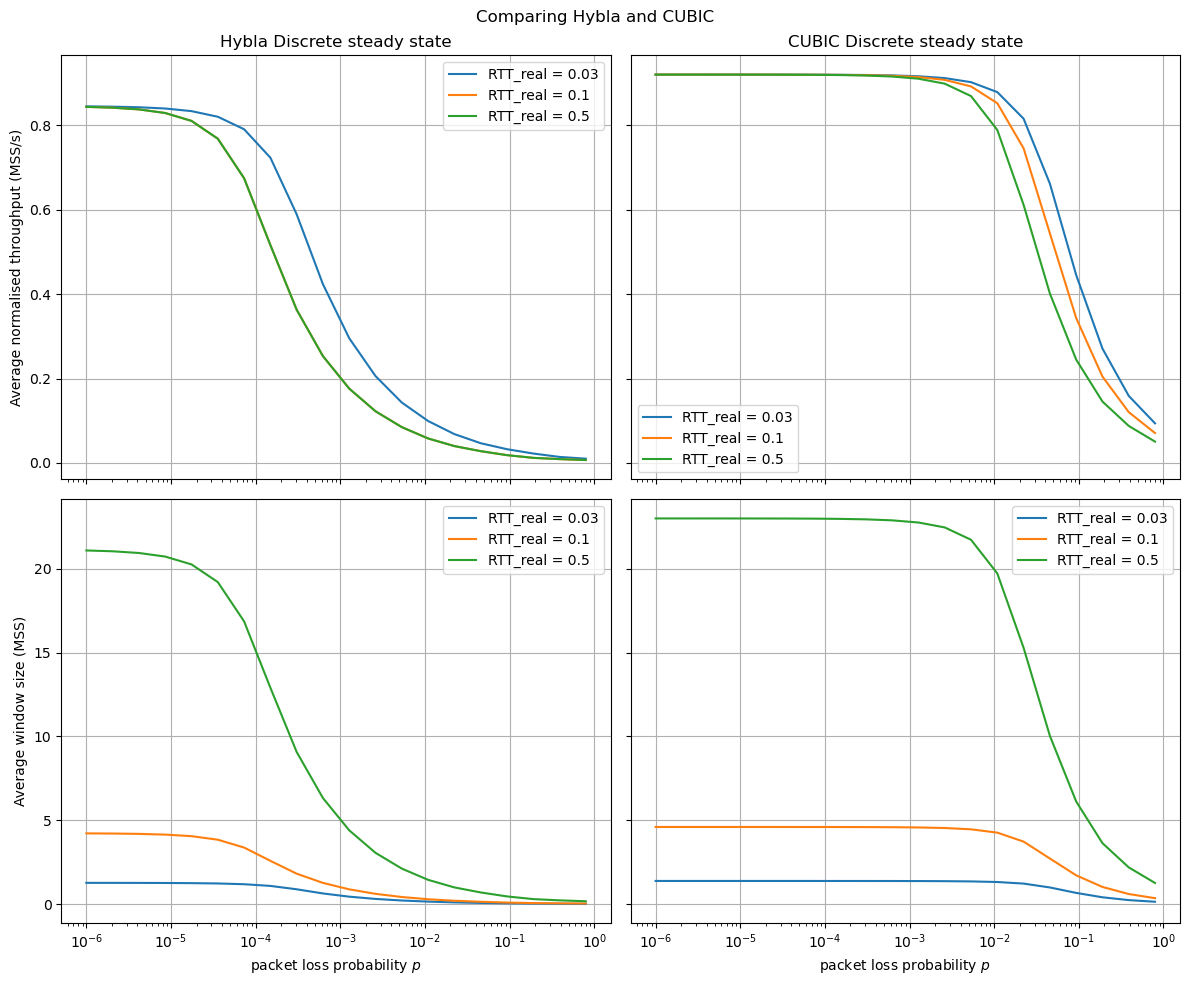

In [4]:
err_rates = np.logspace(-6,-0.1,20)
RTTs = [0.03, 0.1,0.5]
throughputs = np.zeros([len(RTTs),len(err_rates),4])

for k,R in enumerate(RTTs):
    for i, l in enumerate(err_rates):
        wireless = CCA_MarkovChain_Hybla_bit(packet_err=l,beta=0.7 ,N=100, C = 50, RTT_real=R, RTT0=0.05)
        cubic = CCA_MarkovChain_CUBIC_bit(packet_err=l,beta=0.7,N=100,C = 50, RTT_real=R)
        throughputs[k,i,0] = wireless.avg_throughput()
        throughputs[k,i,1] = cubic.avg_throughput()
    throughputs[k,:,2] = throughputs[k,:,0]*wireless.W
    throughputs[k,:,3] = throughputs[k,:,1]*cubic.W

fig, axs = plt.subplots(2, 2, figsize=(12,10),sharex=True, sharey="row")
for k,R in enumerate(RTTs):
    axs[0,0].plot(err_rates,throughputs[k,:,0], label = f"RTT_real = {R}")
    axs[0,1].plot(err_rates,throughputs[k,:,1], label = f"RTT_real = {R}")
    axs[1,0].plot(err_rates,throughputs[k,:,2], label = f"RTT_real = {R}")
    axs[1,1].plot(err_rates,throughputs[k,:,3], label = f"RTT_real = {R}")
axs[0,0].semilogx()
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_title(r"Hybla Discrete steady state")
axs[0,0].set_ylabel(r'Average normalised throughput (MSS/s)')
axs[0,1].semilogx()
axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set_title(r"CUBIC Discrete steady state")
axs[1,0].semilogx()
axs[1,0].legend()
axs[1,0].grid()
axs[1,0].set_xlabel(r"packet loss probability $p$")
axs[1,0].set_ylabel(r'Average window size (MSS)')
axs[1,1].semilogx()
axs[1,1].legend()
axs[1,1].grid()
axs[1,1].set_xlabel(r"packet loss probability $p$")
fig.suptitle("Comparing Hybla and CUBIC")
fig.tight_layout()
plt.show()